In [ ]:
# Cell 1: Import necessary libraries
# We need these for data processing, math, and plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os

# Set plotting style
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define Constants
TARGET_BRANDS = ["Nike", "Google", "Apple", "Adidas"]
PREDICTION_DAYS = 14  # Number of past days used to predict the next day

print("Libraries imported and configuration set.")

Libraries imported and configuration set.


In [ ]:
# Cell 2: Load the main dataset
# This cell loads the CSV file and converts the timestamp column to datetime objects.
df = pd.read_csv('Social Media Engagement Dataset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Dataset Loaded. Total Records: {len(df)}")
print("First 5 rows:")
display(df.head())

Dataset Loaded. Total Records: 12000
First 5 rows:


,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [ ]:
# Cell 3: Define a function to build the LSTM model
# We create a function to avoid repeating the same code for every brand.
def build_lstm_model(input_shape):
    model = Sequential()
    # First LSTM Layer with Dropout
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Second LSTM Layer
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Output Layers
    model.add(Dense(units=25))
    model.add(Dense(units=1)) # Predict one value (Engagement Rate)

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

print("Model builder function defined.")

Model builder function defined.



🚀 PROCESSING BRAND: Nike
✅ Saved processed data to Nike_data.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Saved model to Nike_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

📊 Accuracy Scores for Nike:
   RMSE: 0.3954
   MAE : 0.2802


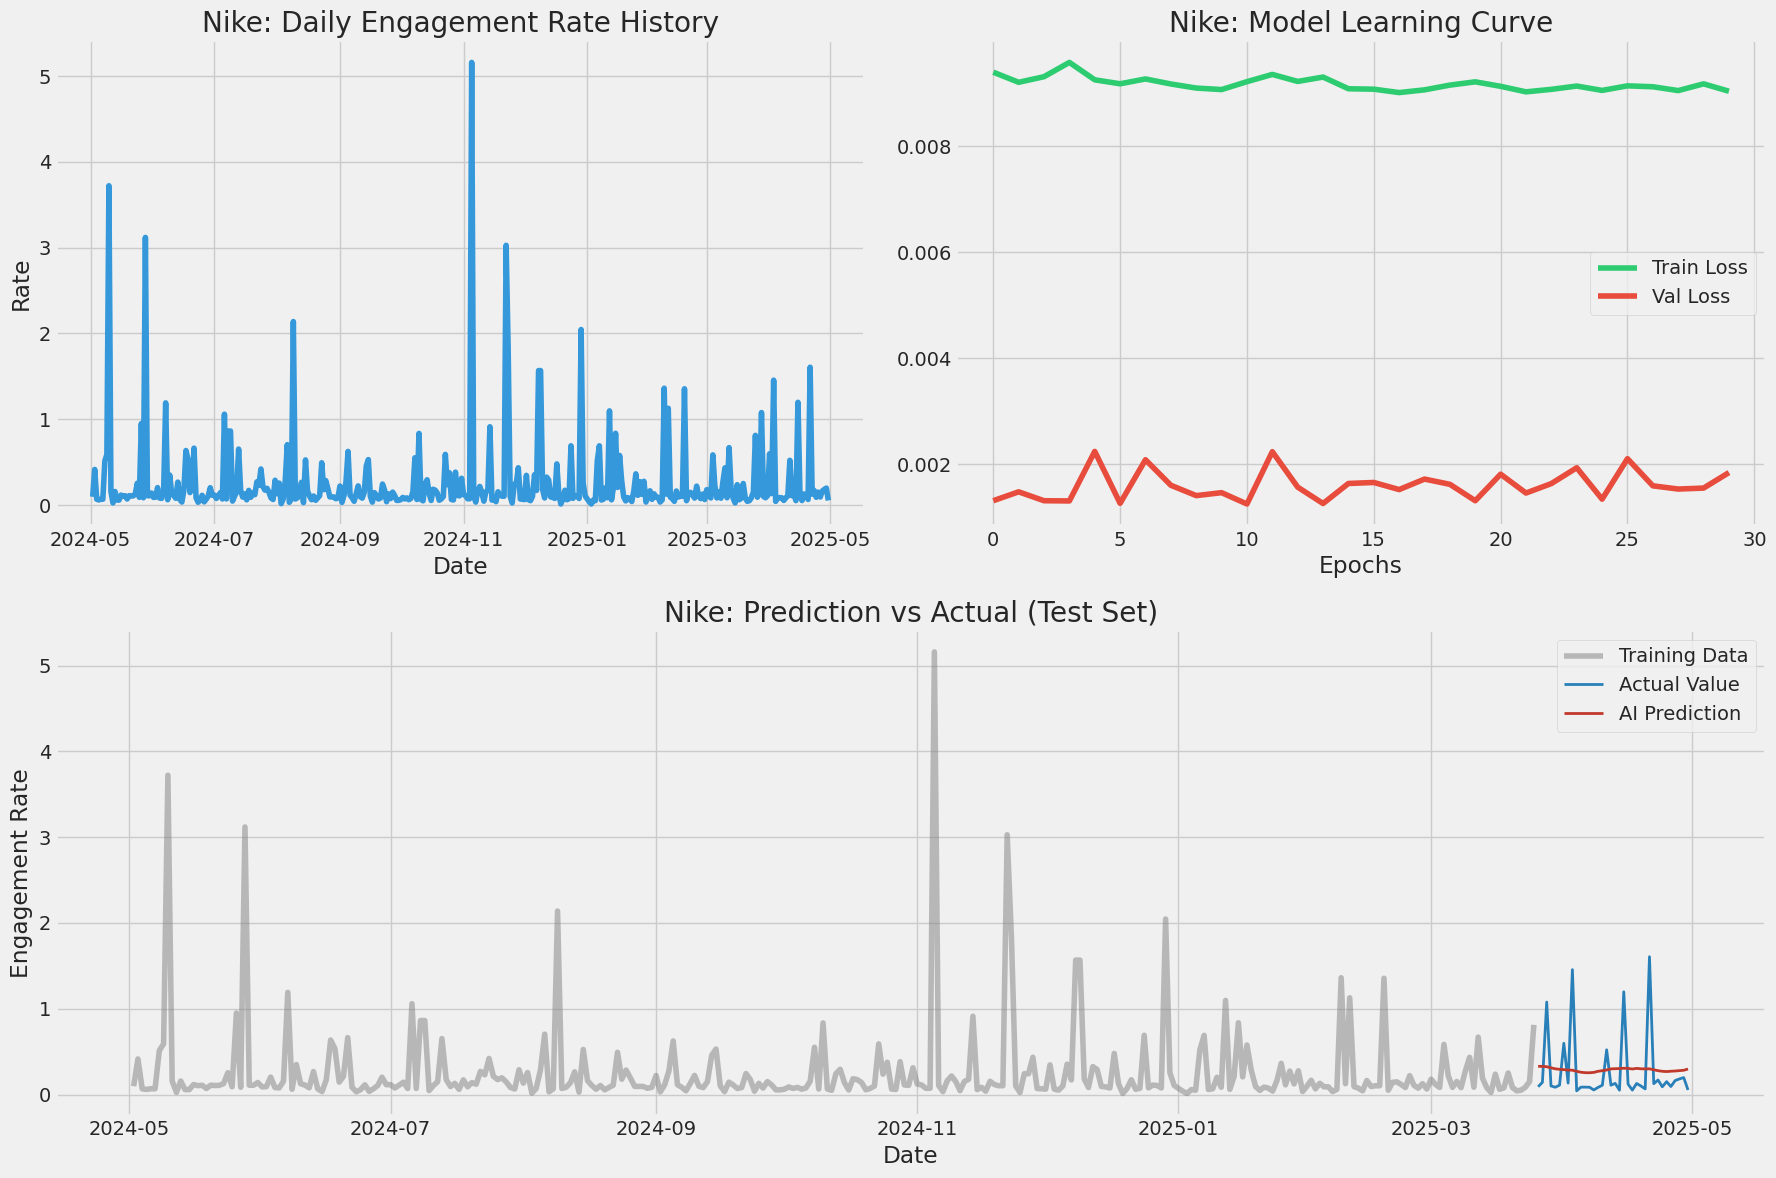


🚀 PROCESSING BRAND: Google
✅ Saved processed data to Google_data.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Saved model to Google_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

📊 Accuracy Scores for Google:
   RMSE: 0.3848
   MAE : 0.2424


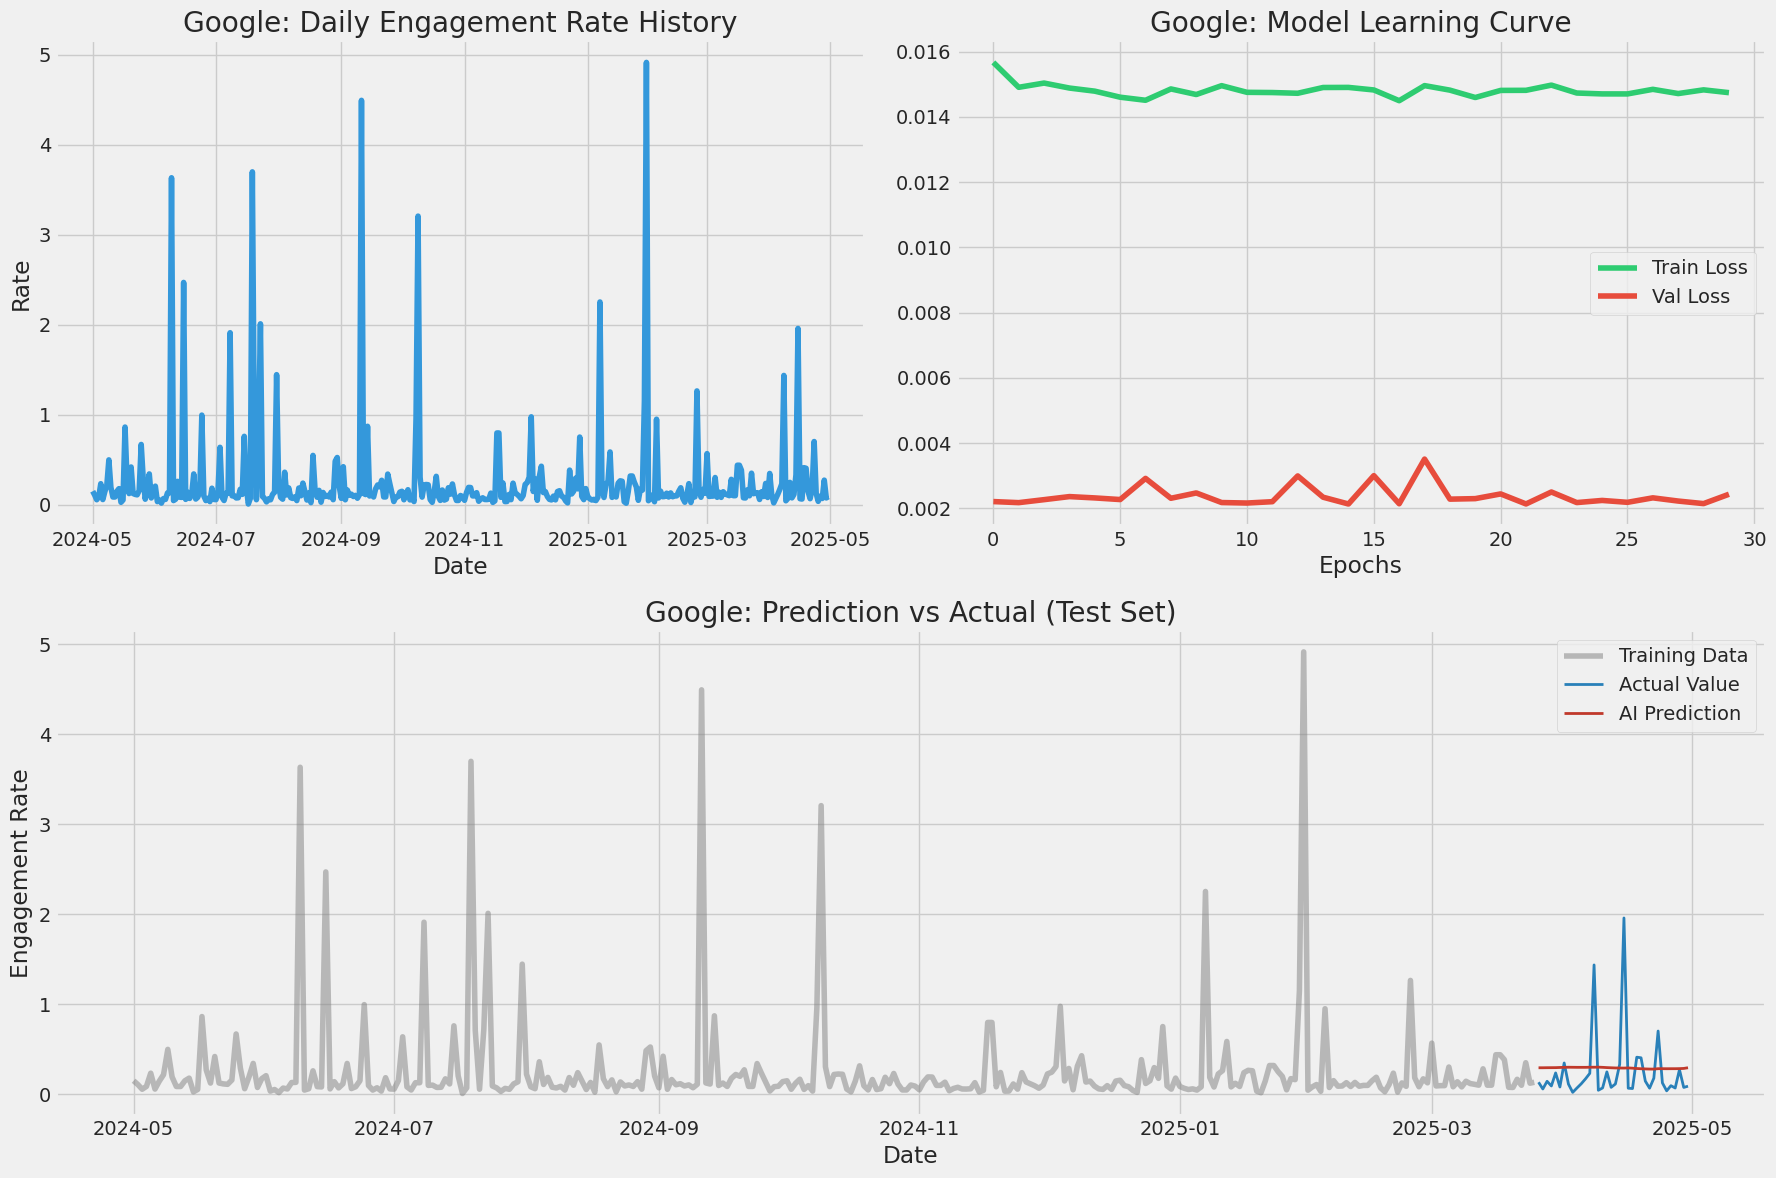


🚀 PROCESSING BRAND: Apple
✅ Saved processed data to Apple_data.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Saved model to Apple_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

📊 Accuracy Scores for Apple:
   RMSE: 0.2352
   MAE : 0.1633


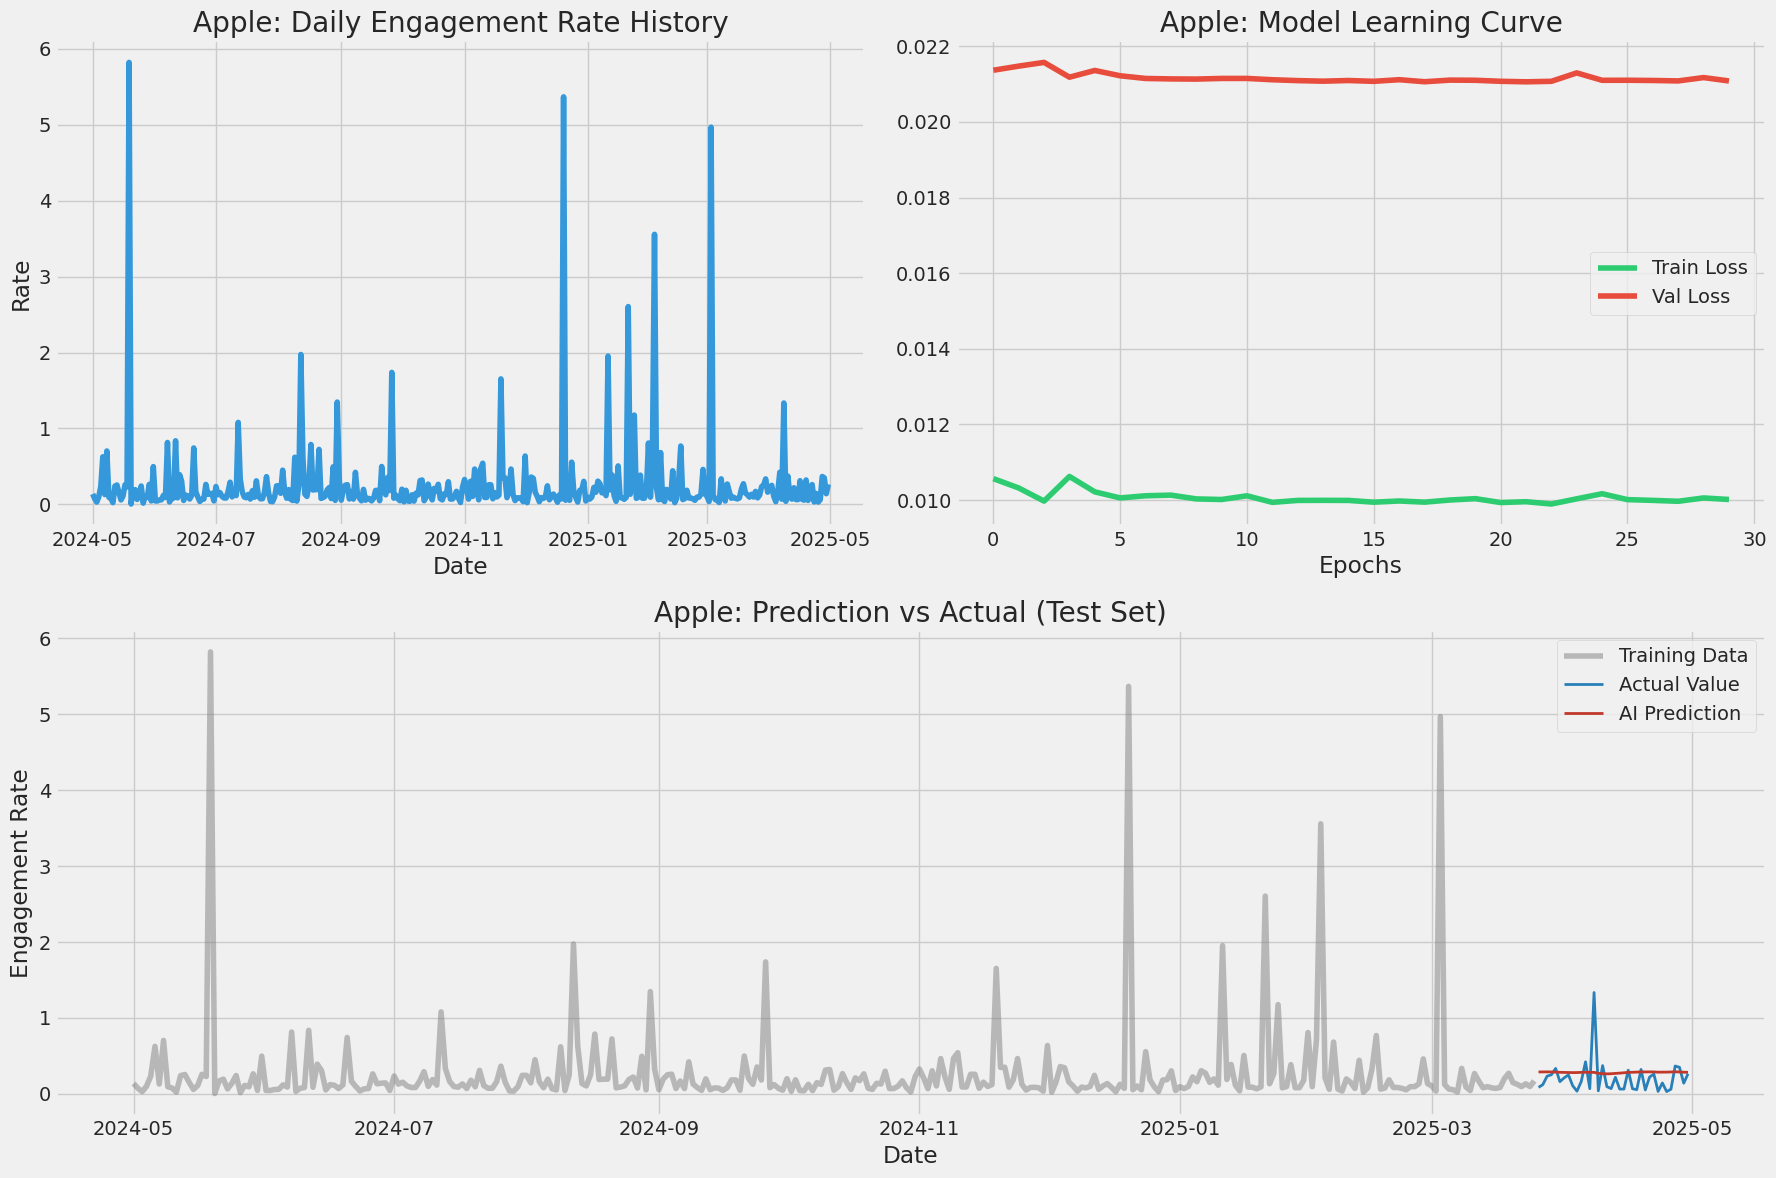


🚀 PROCESSING BRAND: Adidas
✅ Saved processed data to Adidas_data.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Saved model to Adidas_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

📊 Accuracy Scores for Adidas:
   RMSE: 1.0123
   MAE : 0.4338


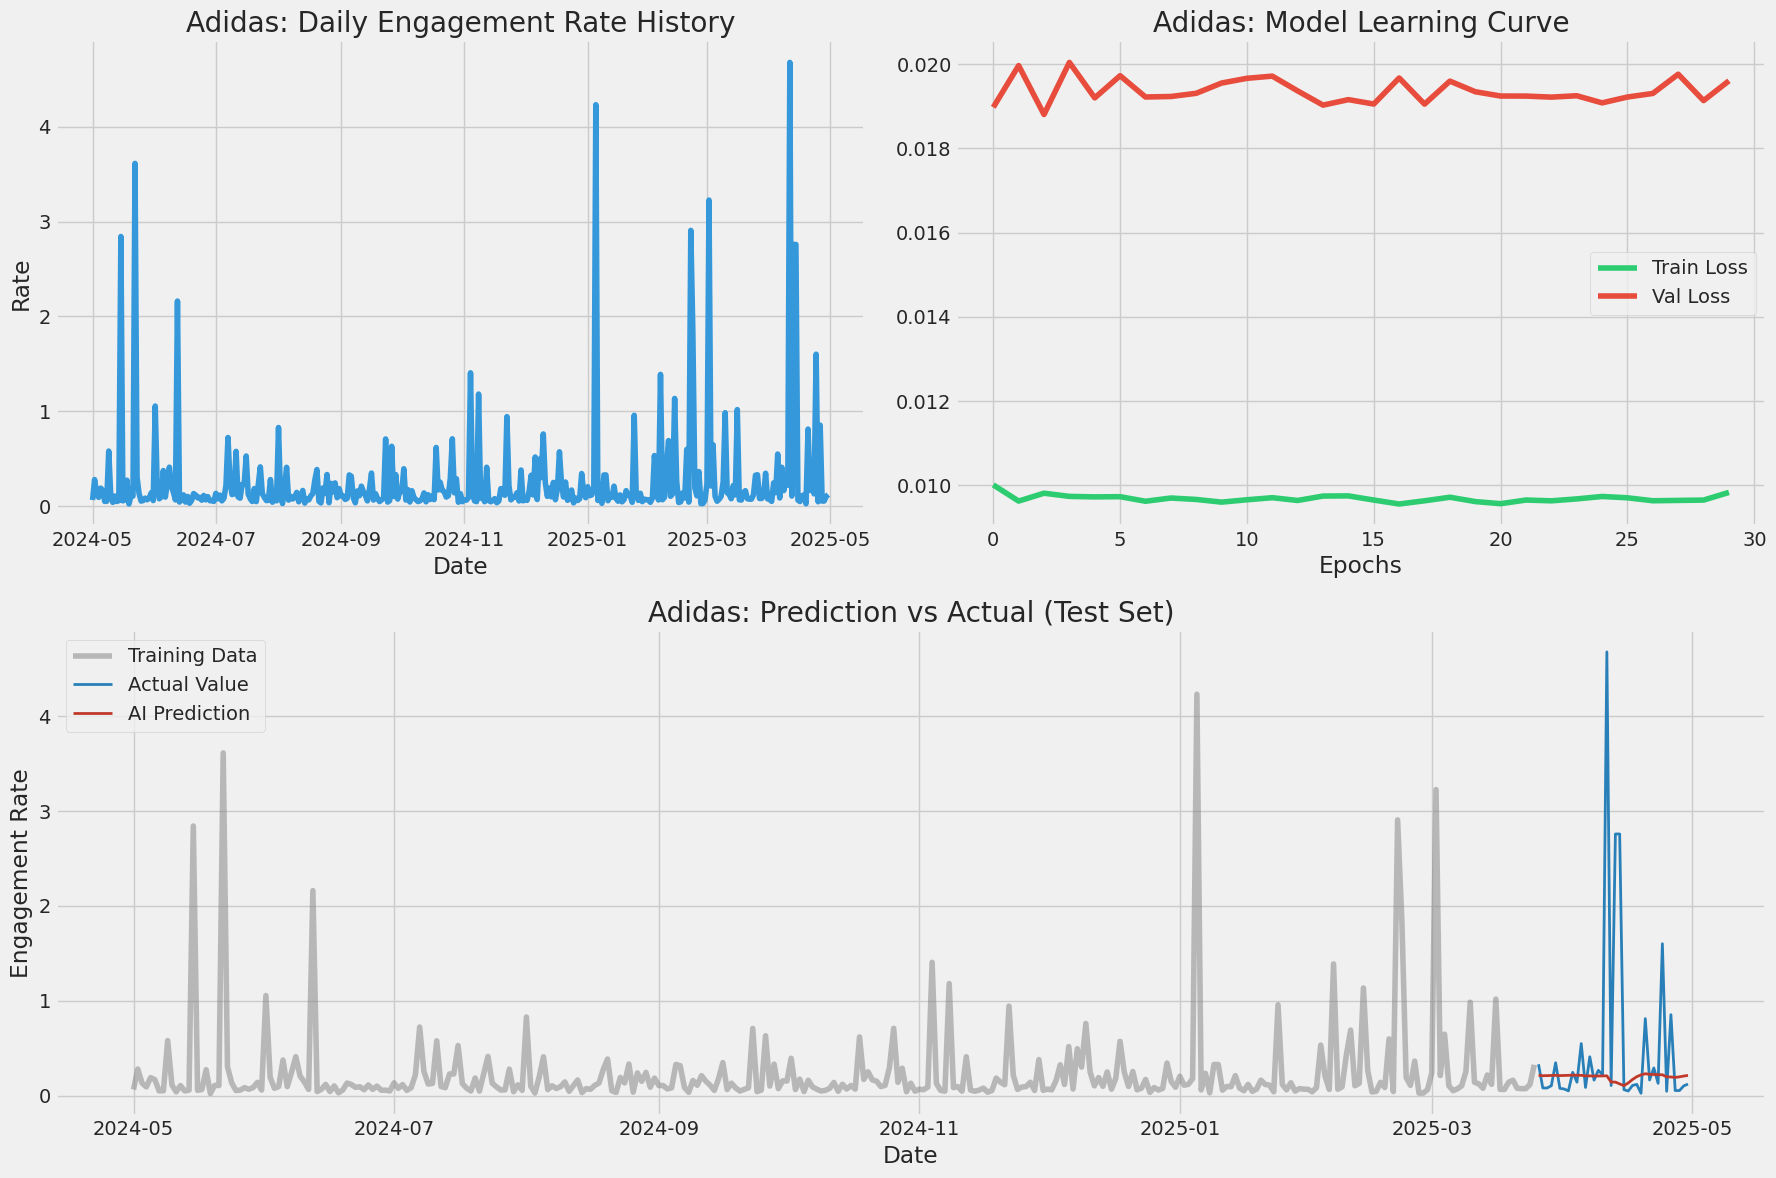

In [ ]:
# Cell 4: Process, Train, Evaluate, and Plot for EACH Brand
for brand_name in TARGET_BRANDS:
    print(f"\n{'='*40}")
    print(f"🚀 PROCESSING BRAND: {brand_name}")
    print(f"{'='*40}")

    # --- 1. Data Preparation ---
    brand_df = df[df['brand_name'] == brand_name].copy()
    if len(brand_df) == 0:
        print(f"Skipping {brand_name}: No data found.")
        continue

    brand_df = brand_df.sort_values('timestamp')

    # Resample to Daily Average (Crucial for Time-Series)
    daily_data = brand_df.resample('D', on='timestamp')['engagement_rate'].mean()
    daily_data = daily_data.ffill() # Handle missing days (updated from fillna(method='ffill'))

    dataset = daily_data.values.reshape(-1, 1)

    # Save Daily Data for GUI
    csv_filename = f"{brand_name}_data.csv"
    daily_df = pd.DataFrame(dataset, columns=['engagement_rate'])
    daily_df.to_csv(csv_filename, index=False)
    print(f"✅ Saved processed data to {csv_filename}")

    # --- 2. Scaling ---
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # --- 3. Create Sequences ---
    training_data_len = int(np.ceil(len(dataset) * 0.90))
    train_data = scaled_data[0:int(training_data_len), :]

    x_train, y_train = [], []
    for i in range(PREDICTION_DAYS, len(train_data)):
        x_train.append(train_data[i-PREDICTION_DAYS:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # --- 4. Train Model ---
    model = build_lstm_model((x_train.shape[1], 1))

    # Train and store history for plotting
    history = model.fit(x_train, y_train, batch_size=16, epochs=30, validation_split=0.1, verbose=0)

    # Save Model for GUI
    model_filename = f"{brand_name}_model.keras" # Updated to .keras format
    model.save(model_filename)
    print(f"✅ Saved model to {model_filename}")

    # --- 5. Evaluation & Predictions ---
    test_data = scaled_data[training_data_len - PREDICTION_DAYS: , :]
    x_test, y_test = [], dataset[training_data_len:, :]

    for i in range(PREDICTION_DAYS, len(test_data)):
        x_test.append(test_data[i-PREDICTION_DAYS:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate Accuracy Scores
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    print(f"\n📊 Accuracy Scores for {brand_name}:")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE : {mae:.4f}")

    # --- 6. VISUALIZATIONS ---
    plt.figure(figsize=(18, 12))

    # Plot A: Daily Engagement History
    plt.subplot(2, 2, 1)
    plt.plot(daily_data.index, daily_data.values, color='#3498db')
    plt.title(f'{brand_name}: Daily Engagement Rate History')
    plt.xlabel('Date')
    plt.ylabel('Rate')

    # Plot B: Model Loss (Training vs Validation)
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='#2ecc71')
    plt.plot(history.history['val_loss'], label='Val Loss', color='#e74c3c')
    plt.title(f'{brand_name}: Model Learning Curve')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot C: Actual vs Predicted
    train = daily_data[:training_data_len]
    valid = daily_data[training_data_len:].to_frame()
    valid['Predictions'] = predictions

    plt.subplot(2, 1, 2) # Spans the bottom row
    plt.title(f'{brand_name}: Prediction vs Actual (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Engagement Rate')
    plt.plot(train.index, train, label='Training Data', color='gray', alpha=0.5) # Fixed: Removed ['engagement_rate']
    plt.plot(valid.index, valid['engagement_rate'], label='Actual Value', color='#2980b9', linewidth=2)
    plt.plot(valid.index, valid['Predictions'], label='AI Prediction', color='#c0392b', linewidth=2)
    plt.legend()

    plt.tight_layout()
    plt.show()